In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Define the start and end date of the chart
start_date = '2023-01-01'
end_date = '2023-10-10'

# Define the forecast date
forecast_date = '2024-01-31'

# Define the number of periods to forecast
forecast_periods = 4

def compute_forecast(data, forecast_date, forecast_periods):
    # Implement your own projection function here
    # For this example, we'll use a simple linear projection
    x = range(len(data))
    y = data['Adj Close']
    coefficients = np.polyfit(x, y, 1)
    slope = coefficients[0]
    intercept = coefficients[1]
    
    # Create a date range for the forecast
    forecast_dates = pd.date_range(start=forecast_date, periods=forecast_periods, freq='D')
    
    # Project values for the forecast period
    forecast = [slope * (len(data) + i) + intercept for i in range(1, forecast_periods + 1)]
    
    return forecast_dates, forecast

def forecast_chart(filename, start_date, end_date, forecast_date, forecast_periods):
    # Read data from the CSV file
    data = pd.read_csv(filename)
    
    # Convert the 'Date' column to datetime
    data['Date'] = pd.to_datetime(data['Date'])
    
    # Filter data within the specified date range
    data = data[(data['Date'] >= start_date) & (data['Date'] <= end_date)]
    
    # Extract X and Y data
    x_obs = data['Date']
    y_obs = data['Adj Close']
    
    plt.plot(x_obs, y_obs, label='observed')
    
    # Compute the forecast
    forecast_dates, forecast = compute_forecast(data, forecast_date, forecast_periods)
    
    # Create a DataFrame for the forecast data
    forecast_df = pd.DataFrame({'Date': forecast_dates, 'Adj Close': forecast})
    
    # Concatenate the data
    combined_data = pd.concat([data, forecast_df], ignore_index=True)
    
    # Plot the combined data
    plt.plot(combined_data['Date'], combined_data['Adj Close'], label='projected', linestyle='--')
    
    plt.title('Forecaster')
    
    # Set x-axis limits to end with the forecast_date
    plt.xlim(x_obs.min(), pd.to_datetime(forecast_date))
    
    # Plot settings
    plt.xlabel('Date')
    plt.ylabel('Adj Close')
    plt.legend()
    
    plt.show()

# Call the function with the CSV file, date range, forecast date, and forecast periods
forecast_chart('test.csv', start_date, end_date, forecast_date, forecast_periods)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Define the start and end date of the chart
start_date = '2023-01-01'
end_date = '2023-10-10'

# Define the forecast date
forecast_date = '2024-01-31'

# Define the number of periods to forecast
forecast_periods = 4

def compute_forecast(data, forecast_date, forecast_periods):
    # Implement your own projection function here
    # For this example, we'll use a simple linear projection
    x = range(len(data))
    y = data['Adj Close']
    coefficients = np.polyfit(x, y, 1)
    slope = coefficients[0]
    intercept = coefficients[1]
    
    # Create a date range for the forecast
    forecast_dates = pd.date_range(start=forecast_date, periods=forecast_periods, freq='D')
    
    # Project values for the forecast period
    forecast = [slope * (len(data) + i) + intercept for i in range(1, forecast_periods + 1)]
    
    return forecast_dates, forecast

def forecast_chart(filename, start_date, end_date, forecast_date, forecast_periods):
    # Read data from the CSV file
    data = pd.read_csv(filename)
    
    # Convert the 'Date' column to datetime
    data['Date'] = pd.to_datetime(data['Date'])
    
    # Filter data within the specified date range
    data = data[(data['Date'] >= start_date) & (data['Date'] <= end_date)]
    
    # Extract X and Y data
    x_obs = data['Date']
    y_obs = data['Adj Close']
    
    plt.plot(x_obs, y_obs, label='observed')
    
    # Compute the forecast
    forecast_dates, forecast = compute_forecast(data, forecast_date, forecast_periods)
    
    # Create a DataFrame for the forecast data
    forecast_df = pd.DataFrame({'Date': forecast_dates, 'Adj Close': forecast})
    
    # Concatenate the data
    combined_data = pd.concat([data, forecast_df], ignore_index=True)
    
    # Plot the combined data
    plt.plot(combined_data['Date'], combined_data['Adj Close'], label='projected', linestyle='--')
    
    plt.title('Forecaster')
    
    # Set x-axis limits to end with the forecast_date
    plt.xlim(x_obs.min(), pd.to_datetime(forecast_date))
    
    # Plot settings
    plt.xlabel('Date')
    plt.ylabel('Adj Close')
    plt.legend()
    
    plt.show()

# Call the function with the CSV file, date range, forecast date, and forecast periods
forecast_chart('test.csv', start_date, end_date, forecast_date, forecast_periods)


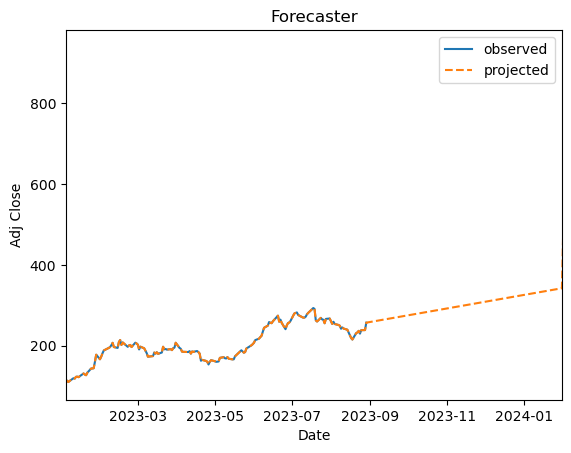

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Define the start and end date of the chart
start_date = '2023-01-01'
end_date = '2023-10-10'

# Define the forecast date
forecast_date = '2024-01-31'

# Define the number of periods to forecast
forecast_periods = 4

def compute_forecast(data, forecast_date, forecast_periods):
    # Implement an exponential moving average (EMA) projection function
    alpha = 2 / (forecast_periods + 1)  # Smoothing factor
    
    # Create a date range for the forecast
    forecast_dates = pd.date_range(start=forecast_date, periods=forecast_periods, freq='D')
    
    # Calculate EMA for the observed data
    ema = data['Adj Close'].ewm(alpha=alpha, adjust=False).mean()
    
    # Project values for the forecast period
    forecast = [ema.iloc[-1] * (1 + alpha) ** i for i in range(1, forecast_periods + 1)]
    
    return forecast_dates, forecast

def forecast_chart(filename, start_date, end_date, forecast_date, forecast_periods):
    # Read data from the CSV file
    data = pd.read_csv(filename)
    
    # Convert the 'Date' column to datetime
    data['Date'] = pd.to_datetime(data['Date'])
    
    # Filter data within the specified date range
    data = data[(data['Date'] >= start_date) & (data['Date'] <= end_date)]
    
    # Extract X and Y data
    x_obs = data['Date']
    y_obs = data['Adj Close']
    
    plt.plot(x_obs, y_obs, label='observed')
    
    # Compute the forecast
    forecast_dates, forecast = compute_forecast(data, forecast_date, forecast_periods)
    
    # Create a DataFrame for the forecast data
    forecast_df = pd.DataFrame({'Date': forecast_dates, 'Adj Close': forecast})
    
    # Concatenate the data
    combined_data = pd.concat([data, forecast_df], ignore_index=True)
    
    # Plot the combined data
    plt.plot(combined_data['Date'], combined_data['Adj Close'], label='projected', linestyle='--')
    
    plt.title('Forecaster')
    
    # Set x-axis limits to end with the forecast_date
    plt.xlim(x_obs.min(), pd.to_datetime(forecast_date))
    
    # Plot settings
    plt.xlabel('Date')
    plt.ylabel('Adj Close')
    plt.legend()
    
    plt.show()

# Call the function with the CSV file, date range, forecast date, and forecast periods
forecast_chart('../test.csv', start_date, end_date, forecast_date, forecast_periods)


D:\Anaconda\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
D:\Anaconda\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
D:\Anaconda\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in cos
  result = getattr(ufunc, method)(*inputs, **kwargs)
D:\Anaconda\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\Spark\AppData\Local\Temp\ipykernel_11340\234345654.py:18: RuntimeWarning: divide by zero encountered in log
  return A + B * (t ** beta) * np.cos(omega * np.log(t) + phi)
C:\Users\Spark\AppData\Local\Temp\ipykernel_11340\234345654.py:18: RuntimeWarning: invalid value encountered in cos
  return A + B *

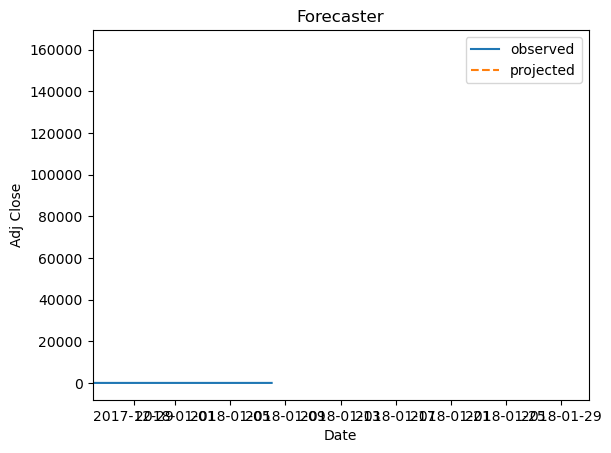

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit

# Define the start and end date of the chart
start_date = '2017-12-26'  # Update to match your dataset
end_date = '2018-01-08'    # Update to match your dataset

# Define the forecast date
forecast_date = '2018-01-31'  # Update to match your forecasting date

# Define the number of periods to forecast
forecast_periods = 4

# Define the log-periodic power law function
def log_periodic_power_law(t, A, B, beta, omega, phi):
    return A + B * (t ** beta) * np.cos(omega * np.log(t) + phi)

def compute_forecast(data, forecast_date, forecast_periods):
    # Extract X and Y data
    data['Date'] = pd.to_datetime(data['Date'])
    x = (data['Date'] - pd.to_datetime(forecast_date)).dt.total_seconds().astype(int)
    y = data['Adj Close']
    
    # Fit the log-periodic power law function to the data
    popt, _ = curve_fit(log_periodic_power_law, x, y)
    
    # Create a date range for the forecast
    forecast_dates = pd.date_range(start=forecast_date, periods=forecast_periods, freq='D')
    
    # Calculate the forecast
    x_forecast = [(date - pd.to_datetime(forecast_date)).total_seconds() for date in forecast_dates]
    forecast = log_periodic_power_law(x_forecast, *popt)
    
    return forecast_dates, forecast

def forecast_chart(filename, start_date, end_date, forecast_date, forecast_periods):
    # Read data from the CSV file
    data = pd.read_csv(filename)
    
    # Compute the forecast
    forecast_dates, forecast = compute_forecast(data, forecast_date, forecast_periods)
    
    # Filter data within the specified date range
    data = data[(data['Date'] >= pd.to_datetime(start_date)) & (data['Date'] <= pd.to_datetime(end_date))]
    
    # Plot observed data
    plt.plot(data['Date'], data['Adj Close'], label='observed')
    
    # Plot forecasted data
    plt.plot(forecast_dates, forecast, label='projected', linestyle='--')
    
    plt.title('Forecaster')
    
    # Plot settings
    plt.xlabel('Date')
    plt.ylabel('Adj Close')
    plt.legend()
    
    # Set x-axis limits to end with the forecast_date
    plt.xlim(data['Date'].min(), pd.to_datetime(forecast_date))
    
    plt.show()

# Call the function with the CSV file, date range, forecast date, and forecast periods
forecast_chart('../test.csv', start_date, end_date, forecast_date, forecast_periods)
